   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

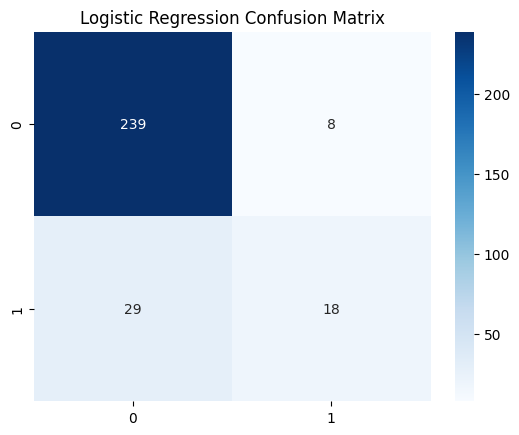


🔹 Decision Tree Results:
Accuracy: 0.782312925170068
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       247
           1       0.32      0.32      0.32        47

    accuracy                           0.78       294
   macro avg       0.59      0.59      0.59       294
weighted avg       0.78      0.78      0.78       294



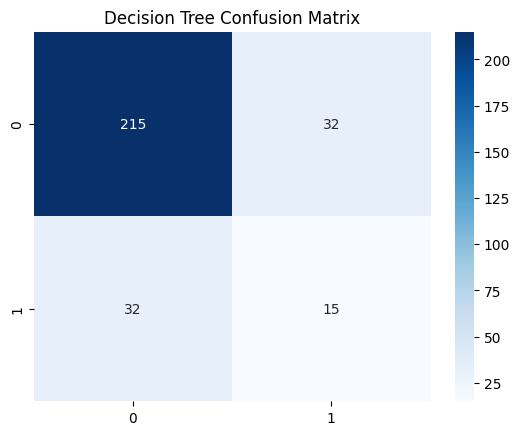


🔹 Random Forest Results:
Accuracy: 0.8367346938775511
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.46      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.66      0.55      0.55       294
weighted avg       0.79      0.84      0.80       294



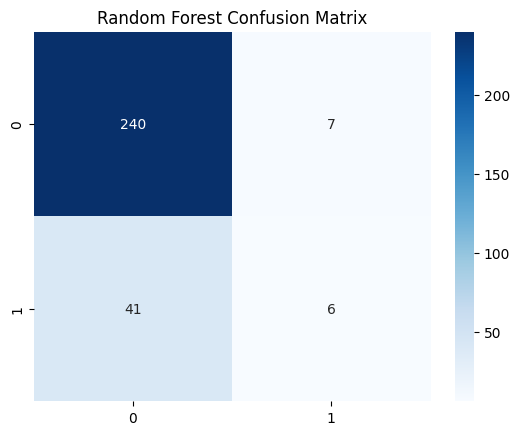

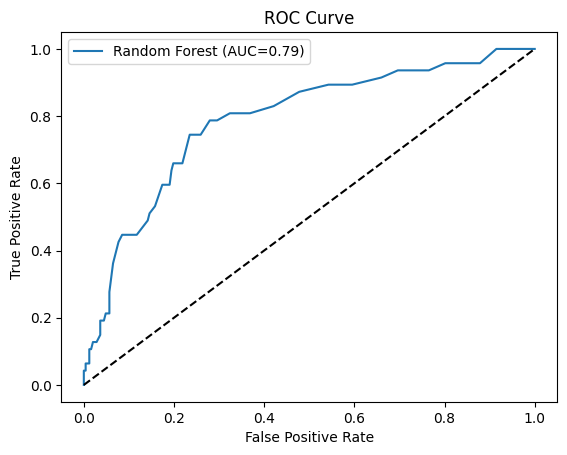

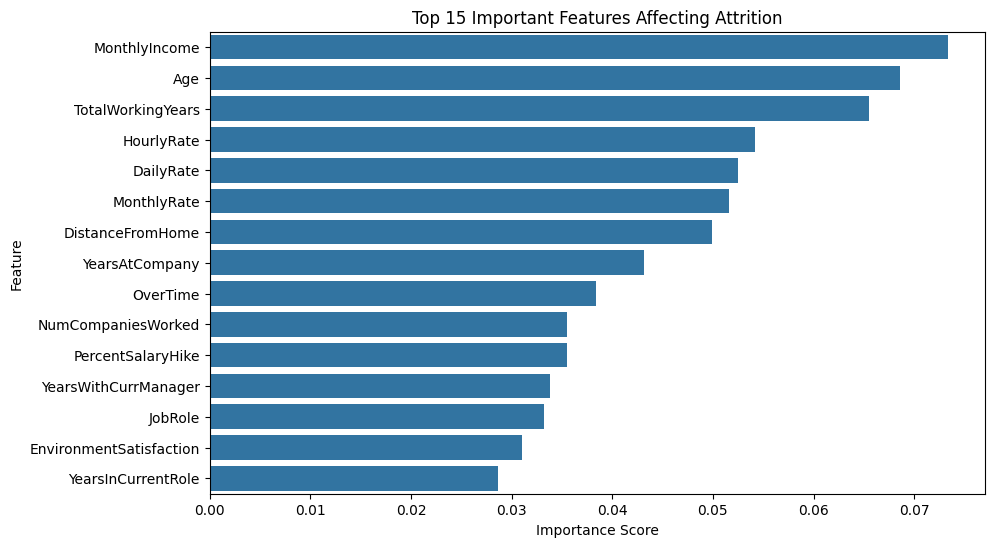

In [1]:
# 📌 Employee Attrition Prediction System

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 2: Load dataset
# (Download IBM HR Analytics Attrition dataset from Kaggle)
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Step 3: Explore dataset
print(df.head())
print(df.info())
print(df['Attrition'].value_counts())

# Step 4: Data Preprocessing
# Encode target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop irrelevant columns (like EmployeeNumber, Over18, EmployeeCount, StandardHours)
df = df.drop(['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split features & target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Build Models
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 7: Evaluate Models
def evaluate_model(name, y_test, y_pred):
    print(f"\n🔹 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)

# Step 8: ROC Curve for Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f"Random Forest (AUC={roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 9: Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances[:15], y=feat_importances.index[:15])
plt.title("Top 15 Important Features Affecting Attrition")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
